### 아래 셀에서 파일명만 변경해주세요

In [1]:
with open('NOUNS_수진_20181030-20191008.txt', 'r') as f:
    total_docs = [x.split('\t\t')[-1].strip() for x in f.readlines()]

docs_nouns = [x.split(' ') for x in total_docs]

DOCS_NUM=len(docs_nouns) 

total_docs_nouns = [] # corpus에 사용된 모든 단어 저장
for words in docs_nouns:
    total_docs_nouns.extend(words)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [9]:
def tf_extractor(corpus): 
    # returns a frequency-based DTM
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
    # min_df: minimum document frequency threshold
         # if min_df = 1 -> 최소 적어도 하나의 문서에서 사용된 단어들은 모두 포함
    # ngram_range=(1,1) -> unigram 만 포함
    # ngram_range=(1,3) -> unigram, bi-gram, tri-gram 까지 고려
    features = vectorizer.fit_transform(corpus) # transform texts to a frequency matrix
    return vectorizer, features  

def tfidf_extractor(corpus):
    # returns a tf-idf based DTM
    vectorizer = TfidfVectorizer(min_df=1, 
                                 ngram_range=(1,1))
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [11]:
documents_filtered = []
for doc in docs_nouns:
    document_filtered =''
    for word in doc:
        document_filtered = document_filtered+' '+word
    documents_filtered.append(document_filtered) 

#### 전체 데이터로 돌릴 때 커널이 죽는다면 아래 셀을 참고해서 데이터 분할 후 진행하세요 (분할 안해도 잘 돌아간다면 실행x)

In [43]:
#1/2로 분할하기
half = len(document_filtered)//2
h_documents_filtered = documents_filtered[:half]     #데이터 슬라이싱; 이 변수로 끝까지 실행 후 documents_filtered[half:]로 변경하여 한번 더 실행해주어야 함
documents_filtered = h_documents_filtered     #tf_extractor와 tfidf_extractor에 전달할 documents_filtered라는 변수에 분할한 데이터 저장

In [17]:
vectorizer_tf, DTM_tf = tf_extractor(documents_filtered) # 문서들을 TF matrix로 변환

In [16]:
vectorizer_tfidf, DTM_tfidf = tfidf_extractor(documents_filtered) # 문서들을 TFIDF matrix로 변환

In [ ]:
import numpy as np

In [20]:
DTM_TF = np.array(DTM_tf.todense())

In [23]:
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=10) #클러스터 수 / 계산할 횟수
clusters = kmeans.fit_predict(DTM_TFIDF) # KMeans 알고리즘으로 학습

In [29]:
dis_total = 0
for i, k in enumerate(clusters):
    dis = np.linalg.norm(DTM_TFIDF[i]-kmeans.cluster_centers_[k])
    dis_total += dis**2
    print('Doc: {0}, Cluster: {1}, Distance to the center: {2}'.format(i, k, dis))
print(dis_total)

Doc: 0, Cluster: 1, Distance to the center: 75.66100662302901
Doc: 1, Cluster: 1, Distance to the center: 75.65672335077106
Doc: 2, Cluster: 1, Distance to the center: 75.66024544624467
Doc: 3, Cluster: 1, Distance to the center: 75.66446399143466
Doc: 4, Cluster: 1, Distance to the center: 75.65726159439846
Doc: 5, Cluster: 4, Distance to the center: 20.704877208008625
Doc: 6, Cluster: 1, Distance to the center: 75.66446399143466
Doc: 7, Cluster: 4, Distance to the center: 20.97490919145353
Doc: 8, Cluster: 1, Distance to the center: 75.63889589627378
Doc: 9, Cluster: 1, Distance to the center: 75.64386890857081
Doc: 10, Cluster: 1, Distance to the center: 75.64938892322385
Doc: 11, Cluster: 4, Distance to the center: 20.938741627512048
Doc: 12, Cluster: 1, Distance to the center: 75.55730619288632
Doc: 13, Cluster: 1, Distance to the center: 75.5845386948378
Doc: 14, Cluster: 1, Distance to the center: 75.6041861880386
Doc: 15, Cluster: 1, Distance to the center: 75.63618230375381
Do

Doc: 764, Cluster: 1, Distance to the center: 75.61447647294636
Doc: 765, Cluster: 2, Distance to the center: 104.72115865534506
Doc: 766, Cluster: 1, Distance to the center: 75.66446399143466
Doc: 767, Cluster: 1, Distance to the center: 75.66446399143466
Doc: 768, Cluster: 1, Distance to the center: 75.65623071734315
Doc: 769, Cluster: 1, Distance to the center: 75.66446399143466
Doc: 770, Cluster: 1, Distance to the center: 75.66446399143464
Doc: 771, Cluster: 0, Distance to the center: 2.4557054244614043
Doc: 772, Cluster: 1, Distance to the center: 75.6482669938781
Doc: 773, Cluster: 4, Distance to the center: 20.931814771892796
Doc: 774, Cluster: 1, Distance to the center: 75.62865870847519
Doc: 775, Cluster: 1, Distance to the center: 75.62148549624871
Doc: 776, Cluster: 1, Distance to the center: 75.66446399143466
Doc: 777, Cluster: 1, Distance to the center: 75.65884589022129
Doc: 778, Cluster: 0, Distance to the center: 2.322319698383176
Doc: 779, Cluster: 4, Distance to the 

Doc: 1723, Cluster: 1, Distance to the center: 75.65404659519835
Doc: 1724, Cluster: 1, Distance to the center: 75.64852044041395
Doc: 1725, Cluster: 0, Distance to the center: 2.338485342967974
Doc: 1726, Cluster: 1, Distance to the center: 75.65257572781194
Doc: 1727, Cluster: 3, Distance to the center: 64.7115245613238
Doc: 1728, Cluster: 4, Distance to the center: 20.892102919154468
Doc: 1729, Cluster: 1, Distance to the center: 75.66047366410035
Doc: 1730, Cluster: 3, Distance to the center: 64.7454392762748
Doc: 1731, Cluster: 1, Distance to the center: 75.66303021703148
Doc: 1732, Cluster: 3, Distance to the center: 64.68251325157765
Doc: 1733, Cluster: 1, Distance to the center: 75.66446399143466
Doc: 1734, Cluster: 1, Distance to the center: 75.66090491938087
Doc: 1735, Cluster: 3, Distance to the center: 64.7688196588451
Doc: 1736, Cluster: 3, Distance to the center: 64.62404227224607
Doc: 1737, Cluster: 1, Distance to the center: 75.64068397938235
Doc: 1738, Cluster: 4, Dist

Doc: 2577, Cluster: 1, Distance to the center: 75.66446399143466
Doc: 2578, Cluster: 2, Distance to the center: 104.7649946386566
Doc: 2579, Cluster: 1, Distance to the center: 75.65735174639268
Doc: 2580, Cluster: 1, Distance to the center: 75.64912676804212
Doc: 2581, Cluster: 4, Distance to the center: 20.898908346228186
Doc: 2582, Cluster: 4, Distance to the center: 20.752624286682096
Doc: 2583, Cluster: 1, Distance to the center: 75.62161891623239
Doc: 2584, Cluster: 1, Distance to the center: 75.65207069070952
Doc: 2585, Cluster: 3, Distance to the center: 64.74836683084526
Doc: 2586, Cluster: 2, Distance to the center: 104.77828030774378
Doc: 2587, Cluster: 1, Distance to the center: 75.6585139174156
Doc: 2588, Cluster: 2, Distance to the center: 104.79659202282676
Doc: 2589, Cluster: 0, Distance to the center: 2.4677684953782024
Doc: 2590, Cluster: 1, Distance to the center: 75.66123945342672
Doc: 2591, Cluster: 2, Distance to the center: 104.80233237580372
Doc: 2592, Cluster: 

In [32]:
kmeans.score(DTM_TFIDF)

-18451.3749352484

### optimal 클러스터 수 구하기

In [30]:
import matplotlib.pylab as pl

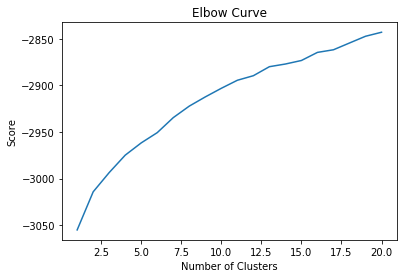

In [42]:
number_clusters = range(1, 8)
kmeans_list = []
for i in number_clusters:
    kmeans_list.append(KMeans(n_clusters=i))
scores = []
for i in range(len(kmeans_list)):
    scores.append(kmeans_list[i].fit(DTM_TFIDF).score(DTM_TFIDF))
    # score = - sum of sq
    # score indicates the variance explained by the clusters
pl.plot(number_clusters,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### optimal 클러스터 수 구하기2

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
for k in range(2,21):
    kmeans = KMeans(n_clusters=k, max_iter=10)
    cluster = kmeans.fit_predict(DTM_TFIDF) 
    print(k, silhouette_score(DTM_TFIDF, cluster))

2 0.007748338606561414
3 0.00907253958132342
4 0.011053392471917611
5 0.013185330330720618
6 0.015109805687277256
7 0.016243262855676573


In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
cluster_idf = AgglomerativeClustering(linkage='ward', n_clusters=5)

In [38]:
clusters = cluster_idf.fit(DTM_TF)

In [39]:
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [9]:
? linkage

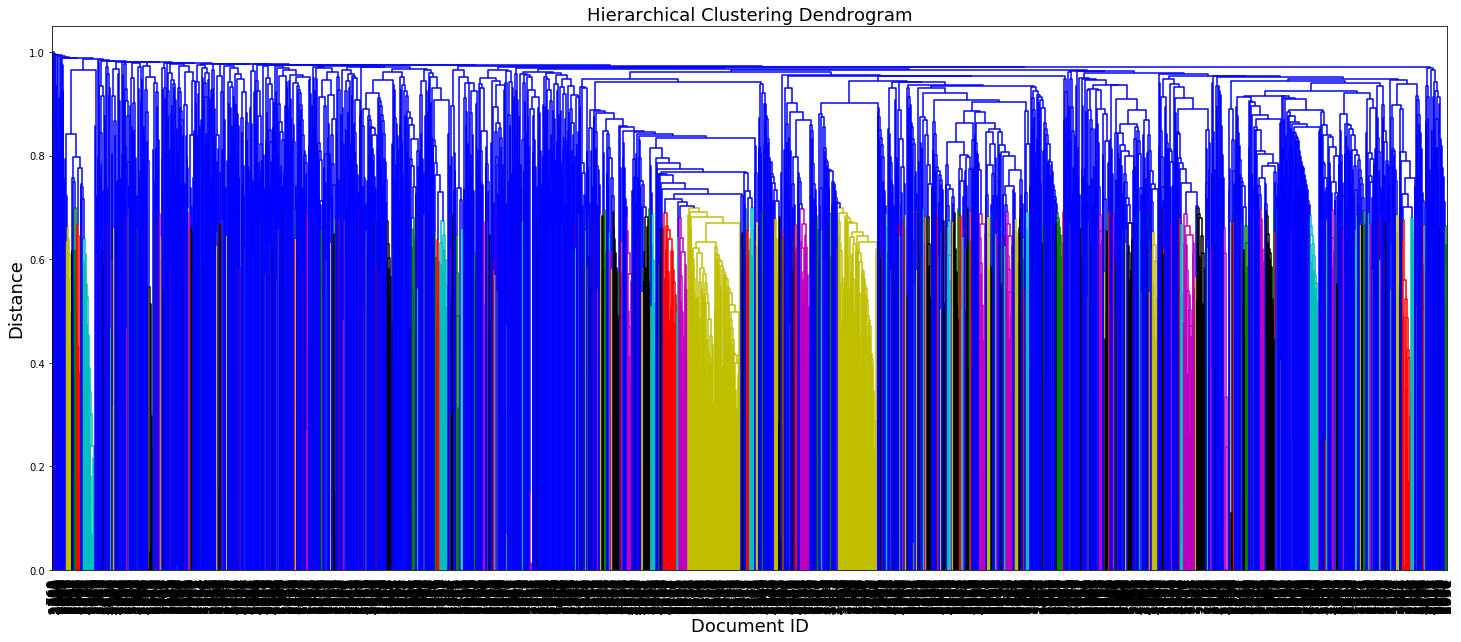

In [41]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
Z = linkage(DTM_TF, 'average', metric='cosine')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()